In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising.csv')

# Separate the data for modelling

In [3]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the XFBoost regressor and train the model

In [5]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Making the predictions on the test set

In [6]:
y_pred = model.predict(X_test)

# Model evaluation

In [7]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

Mean Squared Error: 0.5344679823352011
R-squared: 0.983066947744656


# Saving the prediction with the actual data

In [8]:
predictions_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})

In [9]:
predictions_df.to_csv('sales_predictions.csv', index=False)

# Plotting the actual vs predicted sales

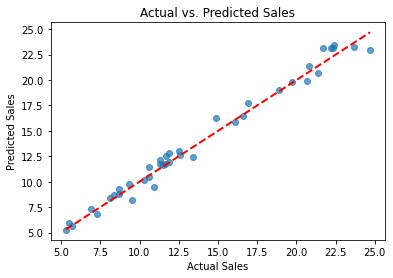

In [10]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# Plotting the feature importance

In [11]:
feature_importances = model.feature_importances_

In [12]:
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

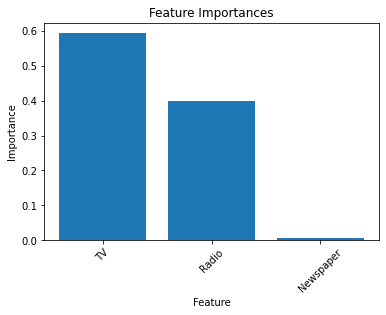

In [13]:
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()